# Optimization

In [1]:
from wpaf_opt import *
from gis.gis_handler import GISHandler

all_vars = ['x_wec','x_type_wec','x_pen','p_pen','x_env','p_env','p_wec','p_fish_salmon','pos_env', 'gis_handler', 'p_vessel', 'x_disc_pen', 'p_es', 'p_diesel', 'p_pen_power', 'p_feedbarge']

# with wave real data
all_vars = all_vars  #+ ['p_wave_vec']
# with wave average data
#all_vars = all_vars  + ['x_wave_ave']

conditions = {'current [m/s]': 'gis/data/Surface Current (m-s).tif',
              'oxygen [mg/l]': 'gis/data/Surface Oxygen (mg-l).tif',
              'salinity [PSU]': 'gis/data/Surface Salinity (PSU).tif',
              'temperature [°C]': 'gis/data/Surface Temperature (C).tif',
              'period [s]': 'gis/data/Wave Energy Period (s).tif',
              'height [m]': 'gis/data/Wave Significant Height (m).tif',
              'bathymetry [m]': 'gis/data/Bathymetry (m).tif',
              #'distance to shore [m]': 'gis/data/Distance to Shore (m).tif',
              'distance to port [m]': 'gis/data/Distance to Port (m).tif'}

# high fishing is above average, very high is more than one standard deviation above average
conflicts = {'very high fishing traffic': 'gis/data/Very High Fishing Vessel Traffic.geojson',
#            'high fishing traffic': 'data/High Fishing Vessel Traffic.geojson',
             'marine protected areas': 'gis/data/Marine Protected Areas.geojson',
             'danger zones': 'gis/data/Danger Zones and Restricted Areas.geojson',
             'submarine': 'gis/data/Submarine Transit Lanes.geojson',
             'torpex': 'gis/data/Cape Cod TORPEX.geojson',
             'block island': 'gis/data/Block Island Renewable Energy Zone.geojson',
             'ma wind': 'gis/data/MA Wind Energy Areas.geojson',
             'wind lease': 'gis/data/Potential Wind Lease Areas.geojson',
             'wind planning': 'gis/data/Wind Planning Areas.geojson',
             'shipping': 'gis/data/Shipping Lanes.geojson'}

waters = "gis/data/Northeast State and Federal Waters.geojson"

handler = GISHandler(conditions, conflicts, waters)

args = {}
args['handler'] = handler
args['wave_data'] = "../Wave Data/32_43.49_-67.88_2009.csv"
args['aqua_load'] = "../Aquaculture Load/Load 24 hour.xlsx"
args['fixed_num_pen'] = 12

x_init, p_init, x, res_best, p_best, op_obj = wpaf_opt(all_vars, args)

aqua_init_obj = Aqua_Obj(x_init.nom0, x_init.name, p_init.nom_dict)
aqua_opt_obj = Aqua_Obj(res_best.x, x.name, p_best) 

init_result(aqua_init_obj)
optimize_result(aqua_opt_obj, x.list, x.unit, res_best)

++++++++++++++++++++++++++++++++++++++++
Initial objective function terms:
   Objective_func      5.286
   cost per yield     52.861 [Million $ / Tonne]
   NPV               134.516 [Million $]
   fish yield          2.545 [Tonne]
----------------------------------------
Initial wave energy converter:
   wec number          6.250 [-]
   wec_P_ave          76.226 [kW]
   wec AEP        4176248.953 [kWh]
----------------------------------------
Initial price break down:
   wec NPV                  40.318 [Million $] 30.0 [%]
   wec CapEx                32.142 [Million $]
   wec OpEx                  0.772 [Million $]
   Aqua NPV                 89.741 [Million $] 66.7 [%]
   Net Pen CapEx            12.723 [Million $]
   Feedbarge CapEx           3.734 [Million $]
   fish feed OpEx            5.290 [Million $]
   fingerling OpEx           1.627 [Million $]
   vessel travel NPV         1.125 [Million $] 0.8 [%]
   energy storage NPV        3.331 [Million $] 2.5 [%]
   diesel gen NPV      

# Plot power

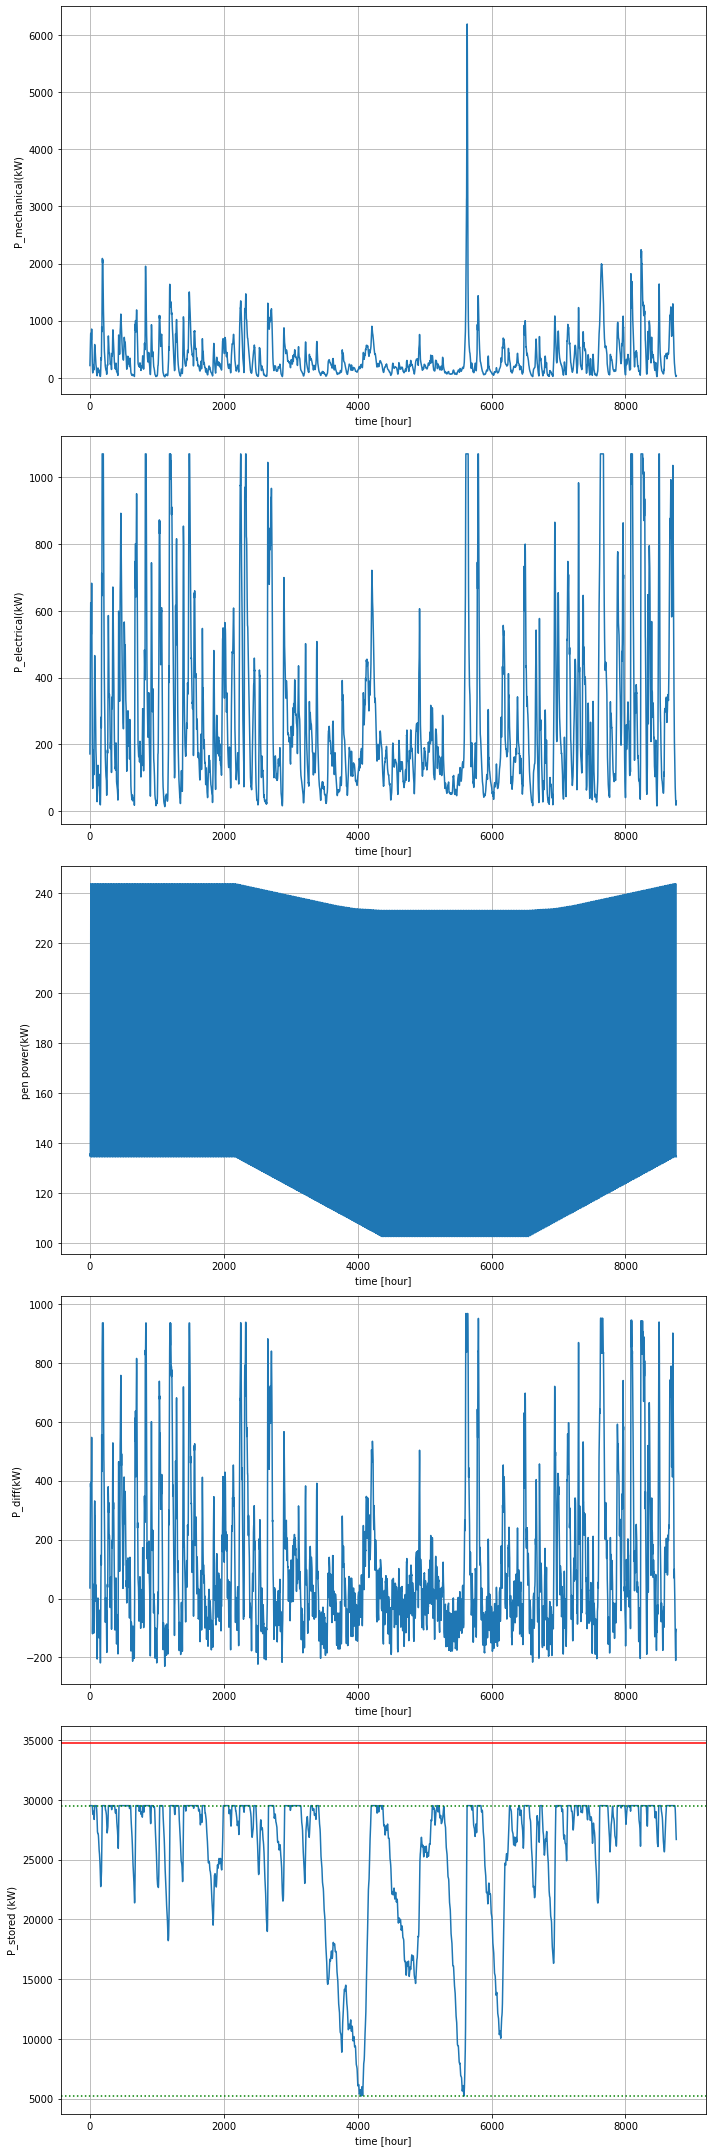

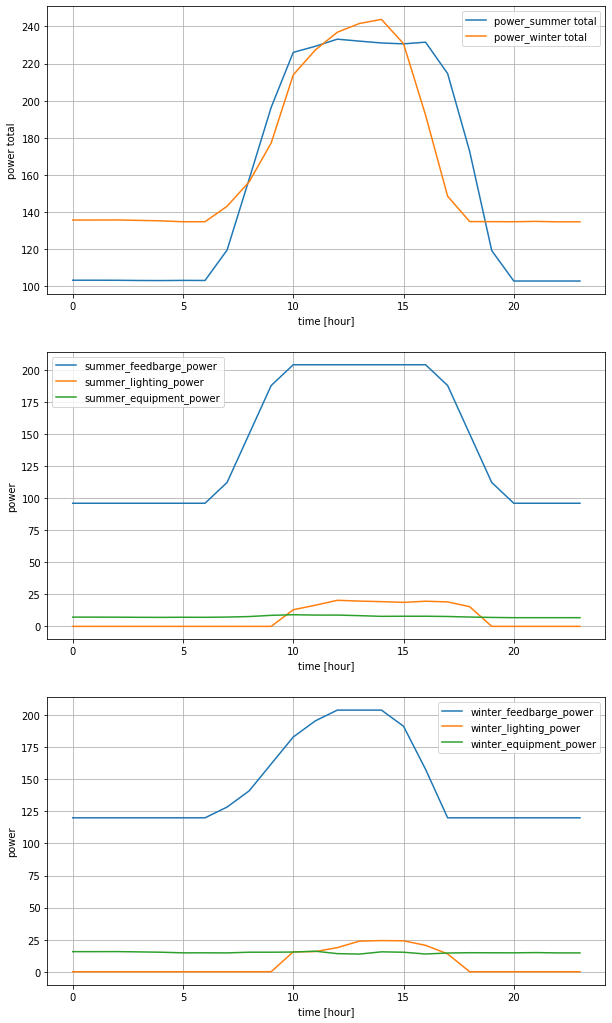

In [2]:
aqua_opt_obj.plot_power()

# Plot fish growth and fish oxygen demand

DO2 for 1kg fish 565.6901602966852
DO2 for 2kg fish 1237.6584963305745
fish weight after 365 days 2947.562810640769


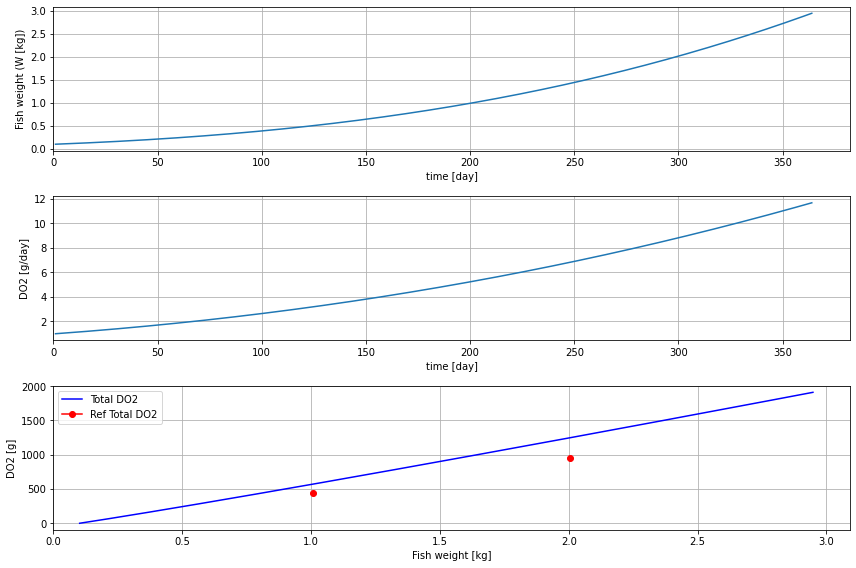

In [3]:
aqua_opt_obj.plot_variable()

# Plot objective function and constraints

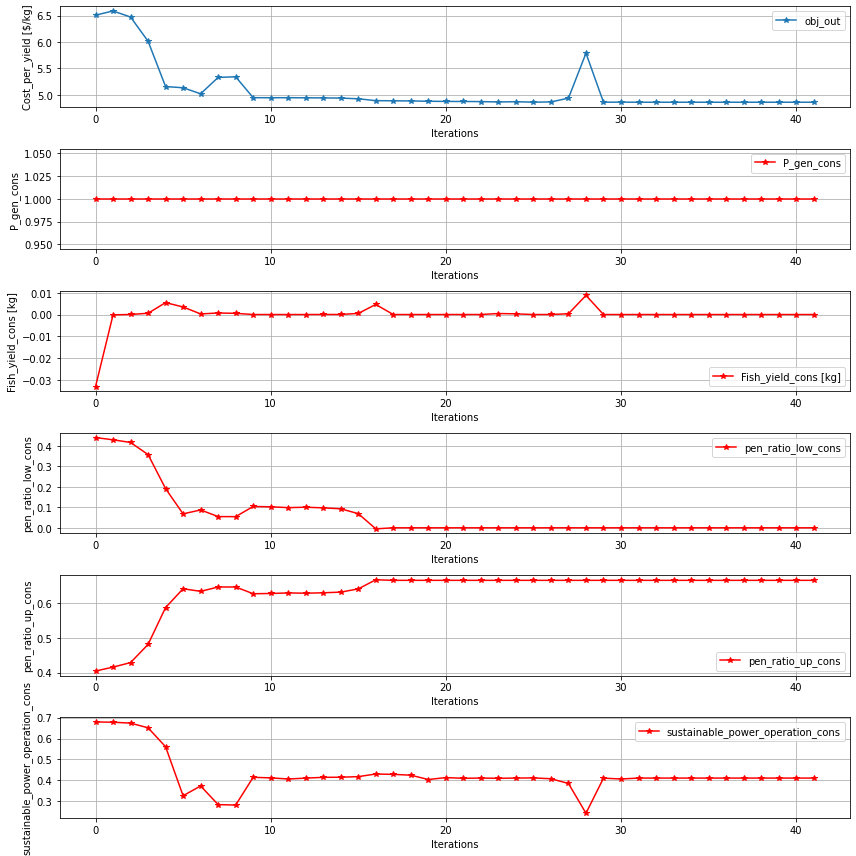

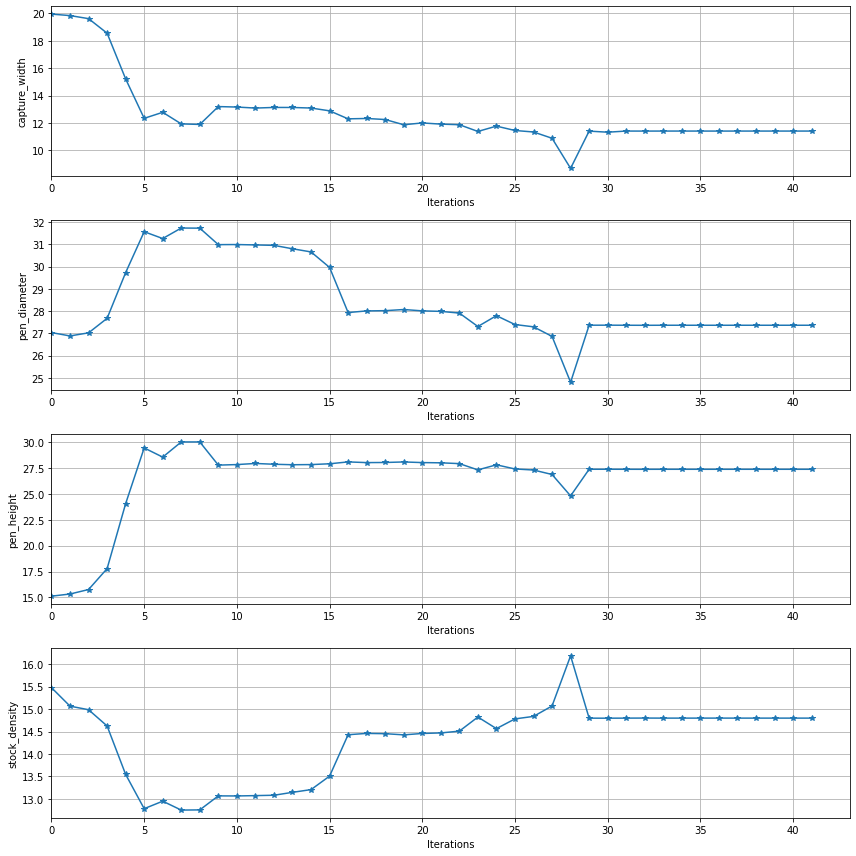

In [4]:
from matplotlib import pyplot as plt

cons_title = ['P_gen_cons','Fish_yield_cons [kg]','pen_ratio_low_cons', 'pen_ratio_up_cons', 'sustainable_power_operation_cons']
cons_no = len(cons_title)

fig, axes = plt.subplots(1+cons_no, 1, figsize=(12, 12))

ax0 = axes[0]
ax0.plot(op_obj.f, label='obj_out', marker='*')
ax0.set(xlabel='Iterations', ylabel='Cost_per_yield [$/kg]')
ax0.legend()
ax0.grid(True)


for i in range (cons_no):
    ax_cons = axes[i+1]
    ax_cons.plot(op_obj.ineq[:, i], 'r', label=cons_title[i], marker='*')
    ax_cons.set(xlabel='Iterations', ylabel=cons_title[i]);
    ax_cons.legend()
    ax_cons.grid(True)

plt.tight_layout()
plt.show()

#fig for design var
fig_x, ax_x = plt.subplots(len(x.list),1, figsize=(12, 12))
for ii in range(len(x.list)):
    ax_x[ii] = plt.subplot(len(x.list),1,ii+1)
for i in range(len(x.list)):
    ax_x[i].plot(op_obj.x_history[:, i], marker='*')
    ax_x[i].set(xlabel='Iterations', ylabel=x.list[i])
    ax_x[i].grid(True)
    ax_x[i].set_xlim(0, None)
    #ax_x[i].set_ylim(5, 85)
    ax_x[i].ticklabel_format(useOffset=False, style='plain', axis='y')
plt.tight_layout()
plt.show()